# Joe EDA 

This is where I'll do my EDA for the Intrusion Detection project.


In [1]:
# imports and boring stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from tqdm.notebook import tqdm

In [2]:
FIGURES = True

In [3]:
# Import dataset from csv to pandas dataframe
df = pd.read_csv('../data/UNSW_NB15/UNSW_NB15_training-set.csv')

categorical_features = ["proto", "state", "service", "attack_cat", "is_sm_ips_ports", "is_ftp_login"]

# Print first 5 rows of dataframe
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


## Exploration of Numeric Features







## Cursory Statistical Analysis of Numeric Features
Below I'll analyze the numeric features of the UNSW_NB15 dataset. I'll examine descriptive statistics (mean, median, standard deviation, variance, min, max, range) for each numeric feature in the next cell. This will help identify outliers and understand the distribution of values. I'll also create histograms and box plots to visualize these distributions, making it easier to interpret patterns and anomalies in the network traffic data. This analysis will be particularly useful for understanding how normal traffic differs from attack traffic. First we will look at the descriptive statistics for each numeric feature.

In [4]:
# Compute summary statistics for numeric features
df_numeric = df.copy()
df_numeric = df_numeric.drop(categorical_features + ['id'], axis=1)
numeric_cols = df_numeric.columns

# Calculate key statistics (mean, median, std, variance, min, max, range)
stats = pd.DataFrame({
    'Mean': df_numeric.mean(),
    'Median': df_numeric.median(),
    'StDev': df_numeric.std(),
    'Variance': df_numeric.var(),
    'Min': df_numeric.min(),
    'Max': df_numeric.max(),
    'Range': df_numeric.max() - df_numeric.min()
})

# Display statistics and class distribution
display(stats)
print(df['label'].value_counts())


,Mean,Median,StDev,Variance,Min,Max,Range
dur,1.359389e+00,0.001582,6.480249e+00,4.199363e+01,0.0,5.999999e+01,5.999999e+01
spkts,2.029866e+01,2.000000,1.368876e+02,1.873821e+04,1.0,9.616000e+03,9.615000e+03
dpkts,1.896959e+01,2.000000,1.102583e+02,1.215689e+04,0.0,1.097400e+04,1.097400e+04
sbytes,8.844844e+03,430.000000,1.747656e+05,3.054303e+10,28.0,1.296523e+07,1.296520e+07
dbytes,1.492892e+04,164.000000,1.436542e+05,2.063653e+10,0.0,1.465555e+07,1.465555e+07
rate,9.540619e+04,3225.806520,1.654010e+05,2.735748e+10,0.0,1.000000e+06,1.000000e+06
sttl,1.795470e+02,254.000000,1.029400e+02,1.059665e+04,0.0,2.550000e+02,2.550000e+02
dttl,7.960957e+01,29.000000,1.105069e+02,1.221177e+04,0.0,2.540000e+02,2.540000e+02
sload,7.345403e+07,879674.750000,1.883574e+08,3.547853e+16,0.0,5.988000e+09,5.988000e+09
dload,6.712056e+05,1447.022705,2.421312e+06,5.862754e+12,0.0,2.242273e+07,2.242273e+07


label
1    119341
0     56000
Name: count, dtype: int64


Before i start to analyze the numeric features, i'm going to generate some histograms and box plots to visualize the distribution of each numeric feature. This cursory analysis will add some context to the statistics I just calculated.

Generating histograms:   0%|          | 0/38 [00:00<?, ?it/s]

Cleaning unused subplots:   0%|          | 0/1 [00:00<?, ?it/s]

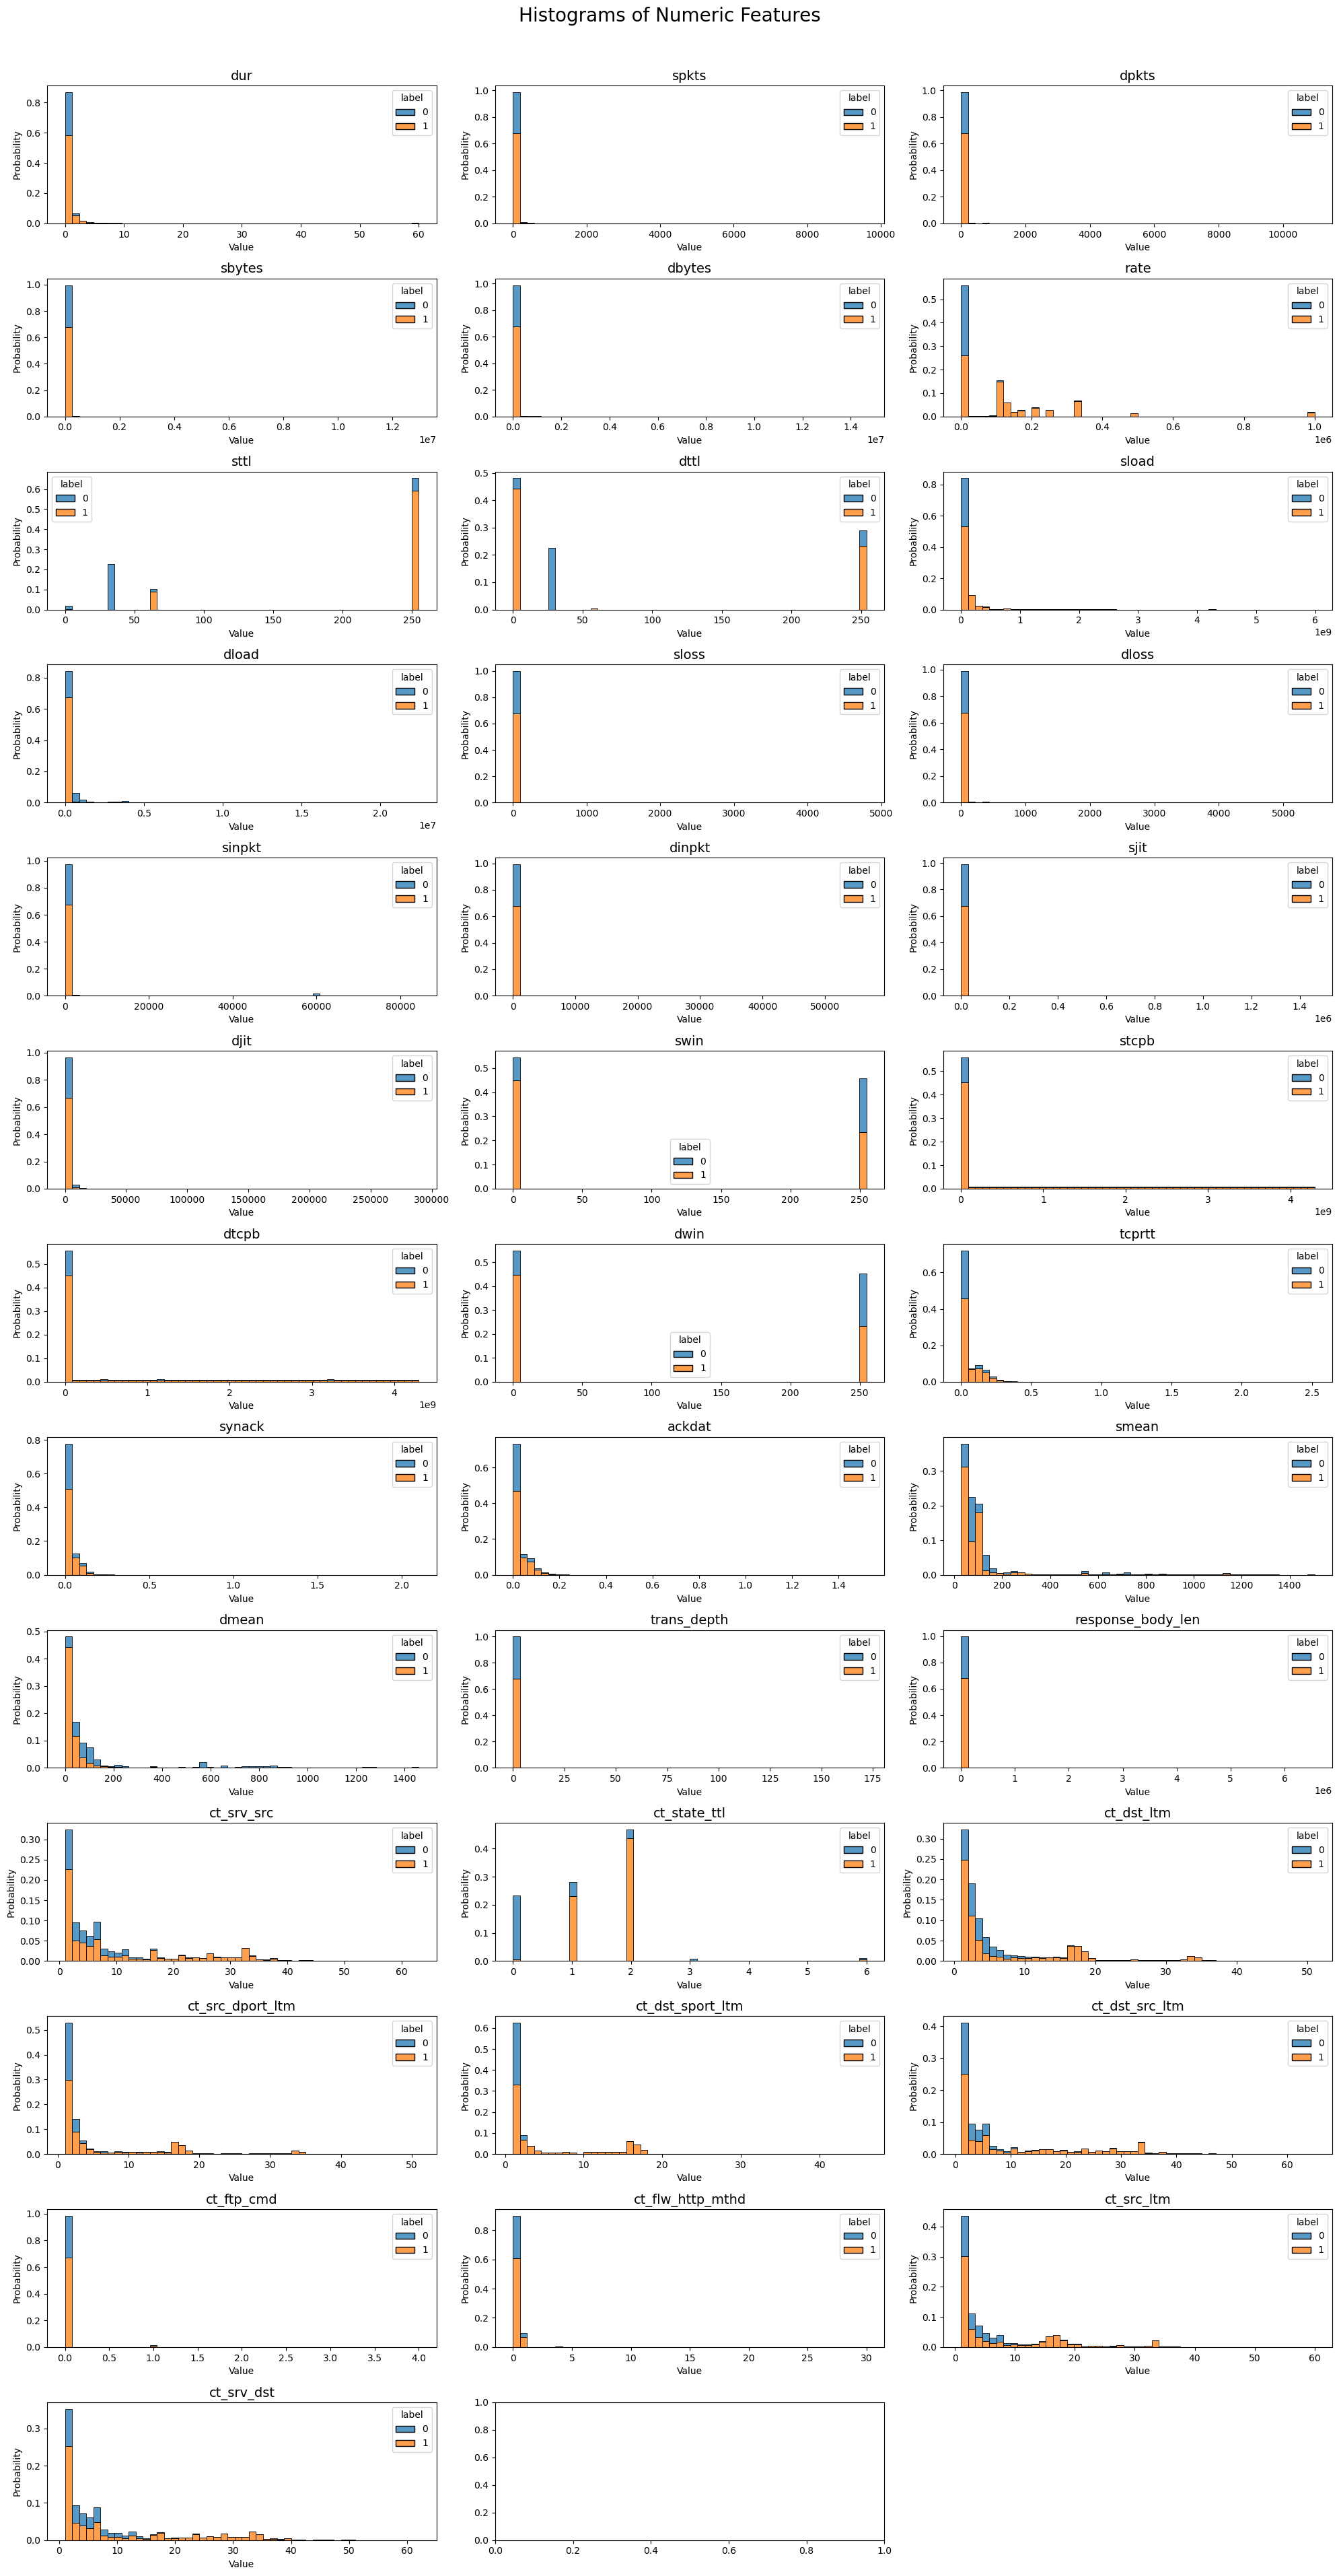

In [5]:
# Define the number of columns for the grid
num_cols = 3

# Calculate the total number of numeric features to plot (excluding 'label')
num_features = len(numeric_cols)

# Calculate rows needed based on the fixed number of columns
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division

# Only create and display figures if FIGURES is True
if FIGURES:
    # Create figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 3 * num_rows))

    # Flatten axes array for easier iteration
    axes = axes.ravel()

    # Generate histograms for each numeric feature
    for idx, col in tqdm(enumerate(numeric_cols), desc="Generating histograms", total=len(numeric_cols)):
        if col == 'label':
            continue  # Skip target variable
        
        # Plot histogram with stacked labels
        sns.histplot(data=df_numeric, x=col, bins=50, stat="probability", kde=False,
                    ax=axes[idx], hue='label', multiple='stack')
        
        # Set labels
        axes[idx].set_title(col, fontsize=14)  # Increased title size for individual plots
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Probability')

    # Remove any unused subplots
    for idx in tqdm(range(len(numeric_cols), len(axes)), desc="Cleaning unused subplots"):
        fig.delaxes(axes[idx])

    # Add title and adjust layout
    plt.suptitle('Histograms of Numeric Features', fontsize=20)  # Increased main title size
    plt.tight_layout()
    plt.subplots_adjust(top=0.95, hspace=0.4)  # Added more space at top and between plots

    # Save the figure as PNG
    plt.savefig('./EDA-Joe-Figures/numeric_feature_histograms.png', dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()


Generating box plots:   0%|          | 0/38 [00:00<?, ?it/s]

Cleaning unused subplots:   0%|          | 0/1 [00:00<?, ?it/s]

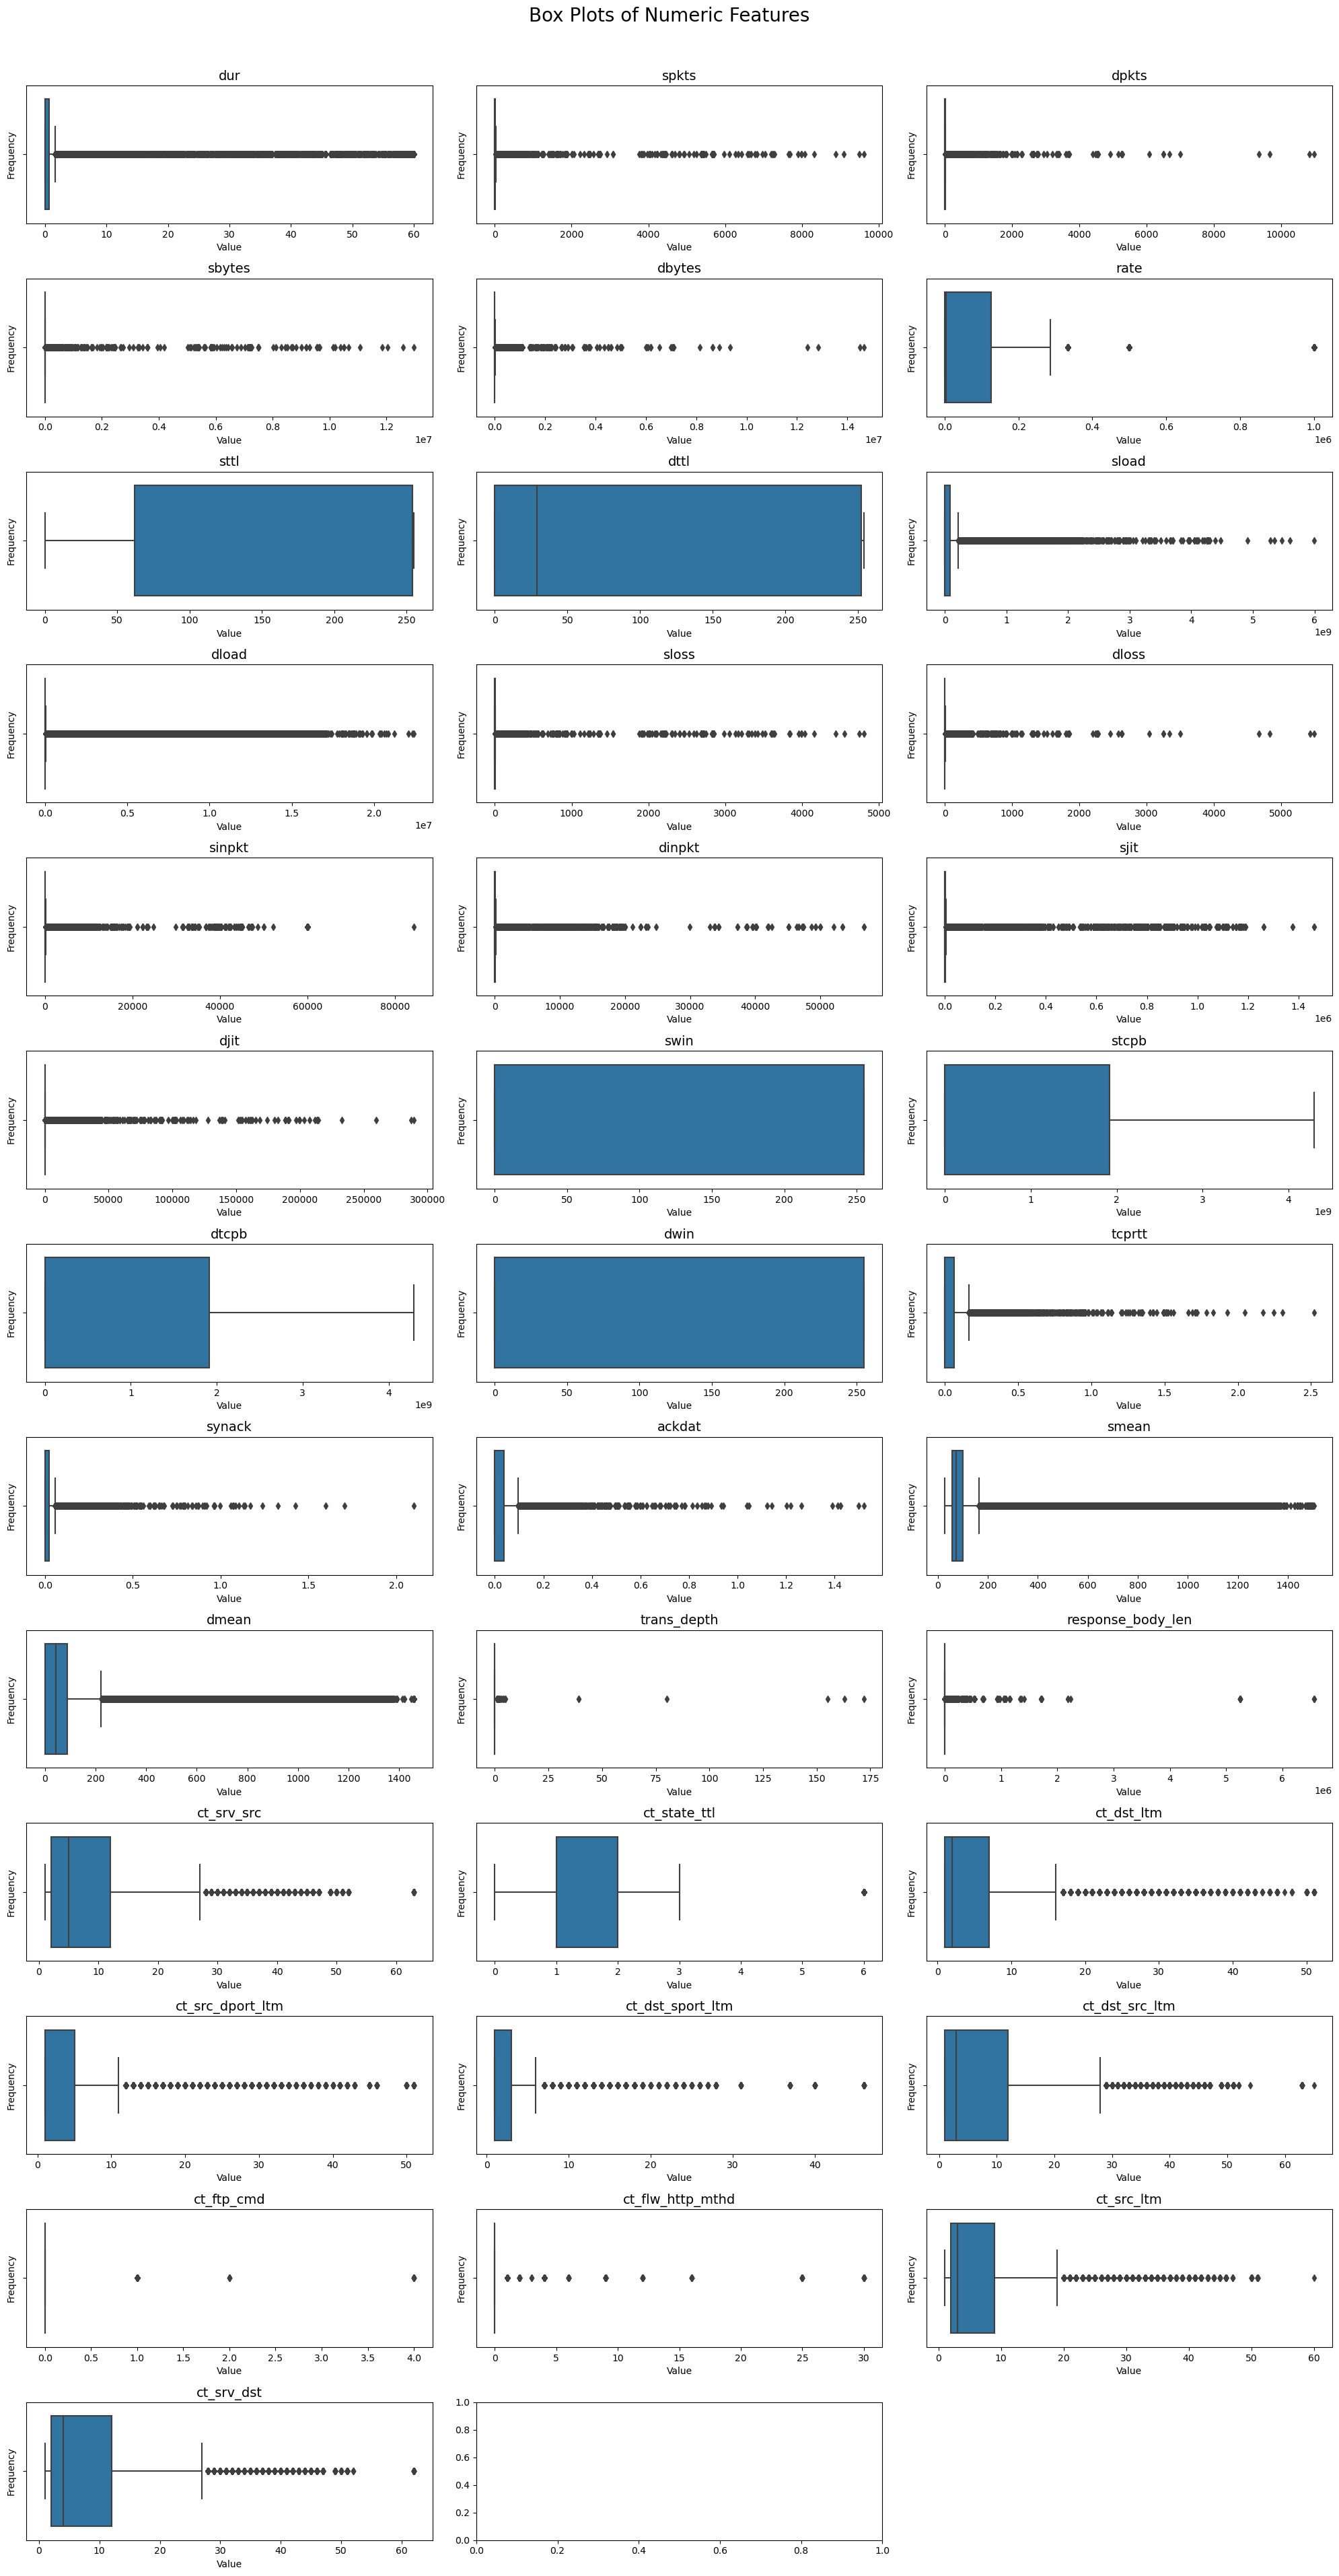

In [6]:
# Set up grid for box plots with a fixed number of columns
num_cols = 3 # Hardcoded number of columns
num_features = len(numeric_cols)
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows based on columns

# Only create and display figures if FIGURES is True
if FIGURES:
    # Create figure and axes with increased spacing between subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 3 * num_rows))
    axes = axes.ravel()

    # Generate box plots
    for idx, col in tqdm(enumerate(numeric_cols), desc="Generating box plots", total=len(numeric_cols)):
        if col == 'label':
            continue
        sns.boxplot(x=df_numeric[col], ax=axes[idx])
        axes[idx].set_title(col, fontsize=14)  # Increased title size for individual plots
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Frequency')

    # Clean up and display
    for idx in tqdm(range(len(numeric_cols), len(axes)), desc="Cleaning unused subplots"):
        fig.delaxes(axes[idx])

    # Add larger title and adjust spacing
    plt.suptitle('Box Plots of Numeric Features', fontsize=20)  # Increased main title size
    plt.tight_layout()
    plt.subplots_adjust(top=0.95, hspace=0.4)  # Added more space at top and between plots

    # Save the figure as PNG
    plt.savefig('./EDA-Joe-Figures/numeric_feature_boxplots.png', dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()


Creating density plots:   0%|          | 0/37 [00:00<?, ?it/s]

Cleaning unused subplots:   0%|          | 0/2 [00:00<?, ?it/s]

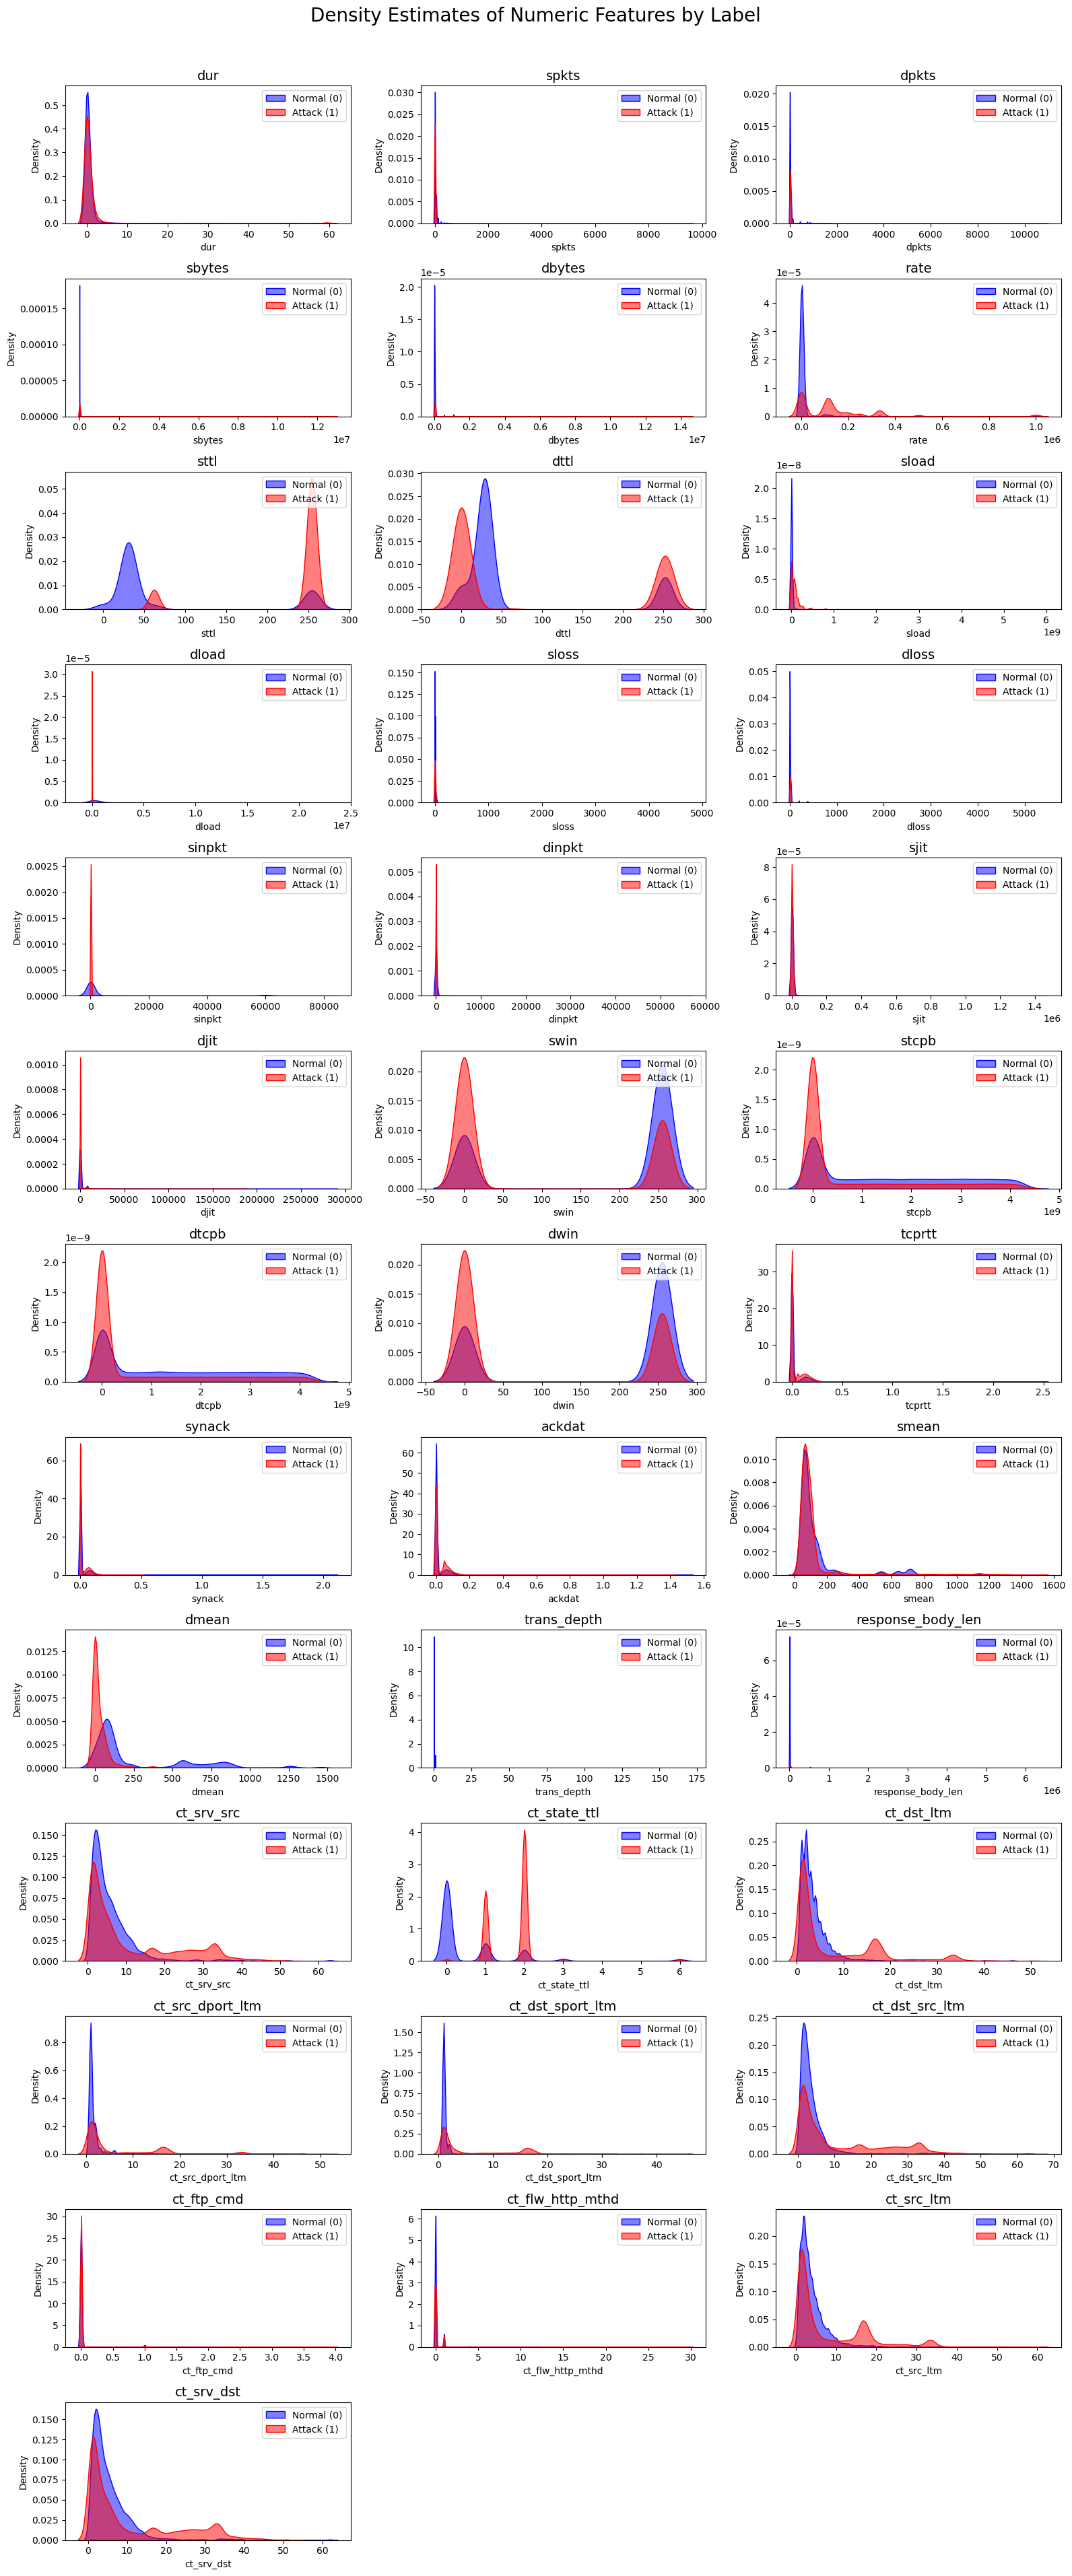

In [7]:
# Create density plots comparing numeric features by label (normal vs attack)
plot_cols = [col for col in numeric_cols if col != 'label']
num_plots = len(plot_cols)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate required rows

# Only create and display figures if FIGURES is True
if FIGURES:
    # Set up subplot grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 3 * num_rows))
    axes = axes.ravel()  # Flatten axes array for easier indexing
    
    # Generate KDE plots for each feature
    for idx, col in tqdm(enumerate(plot_cols), desc="Creating density plots", total=len(plot_cols)):
        ax = axes[idx]
        
        # Plot density for normal traffic (label=0)
        sns.kdeplot(data=df[df['label'] == 0], x=col, fill=True, common_norm=False, 
                    alpha=0.5, ax=ax, color='blue', label='Normal (0)')
        
        # Plot density for attack traffic (label=1)
        sns.kdeplot(data=df[df['label'] == 1], x=col, fill=True, common_norm=False, 
                    alpha=0.5, ax=ax, color='red', label='Attack (1)')
        
        # Set plot labels and styling
        ax.set_title(col, fontsize=14)
        ax.set_xlabel(col)
        ax.set_ylabel('Density')
        ax.legend()

    # Remove any empty subplots
    for idx in tqdm(range(num_plots, len(axes)), desc="Cleaning unused subplots"):
        fig.delaxes(axes[idx])

    # Add overall title and adjust layout
    plt.suptitle('Density Estimates of Numeric Features by Label', fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95, hspace=0.4)  # Add space for title and between subplots

    # Save visualization to file
    plt.savefig('./EDA-Joe-Figures/numeric_feature_density_by_label.png', dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()


In the cell below, I analyze the correlation between each numeric feature and the target label. I first compute the correlation matrix for all numeric features including the label. Then I extract the correlation coefficients specifically between each feature and the 'label' column, sort them by absolute value to identify the strongest relationships, and display the results as a DataFrame. I also create a bar plot visualization of these correlations using seaborn, with a color gradient to distinguish positive and negative correlations. The plot helps identify the most predictive features for the classification task, with sttl, ct_state_ttl, and dload showing the strongest relationships with the target label.


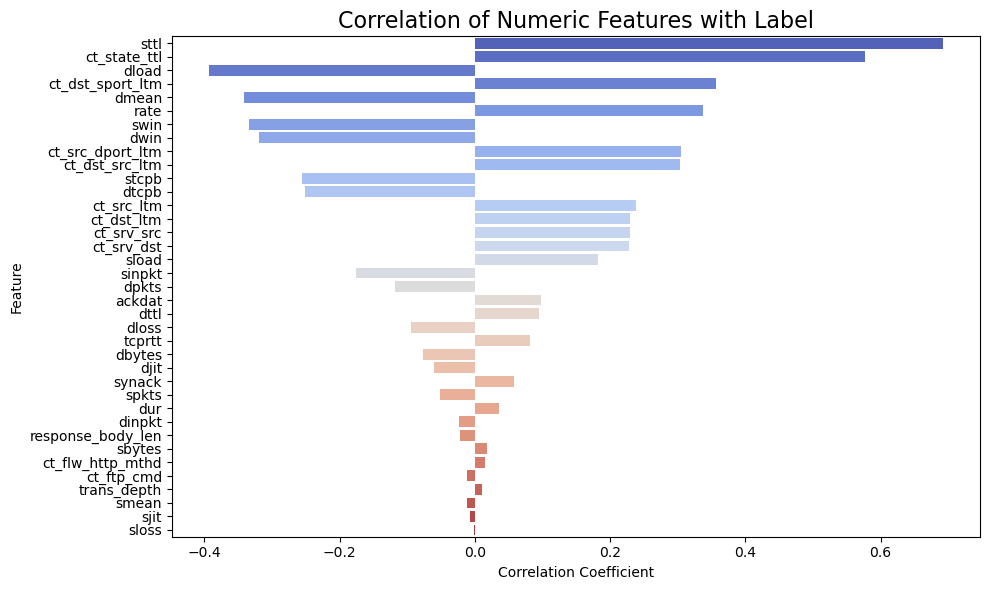

In [8]:
# Now we will determine the correlation between each numeric feature and the label, 
# sorted by absolute correlation, and display it as a pandas DataFrame.
# Compute the correlation matrix for the numeric features including the label
corr_matrix = df[numeric_cols].corr()

# Extract the correlation coefficients for each feature with 'label'
label_corr = corr_matrix['label'].drop('label')

# Sort features by the absolute value of their correlation with 'label'
label_corr = label_corr.reindex(label_corr.abs().sort_values(ascending=False).index)

# Convert the sorted correlation Series to a DataFrame for a pretty display in the notebook
label_corr_df = label_corr.to_frame(name='Correlation')

# Create a seaborn bar plot to visualize the correlation coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=label_corr.values, y=label_corr.index, palette="coolwarm")
plt.title("Correlation of Numeric Features with Label", fontsize=16)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()

# Save the figure as PNG
plt.savefig('./EDA-Joe-Figures/numeric_feature_correlation_with_label.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


Based on this analysis, we can already see a few interesting things about the numeric features:
1. There are already features with decent correlation to the label, which will be important for model selection and feature engineering. The specific features are sttl, ct_state_ttl, dload.
2. We can see in the side by side density estimates that there are some features that have a noticeable difference in distribution between normal and attack traffic. This will be important to consider when selecting features for the model.
3. We can see that for many features there are extreme outliers, which we will need to handle by either removing them or scaling the data. 








## Wrangling numeric features with outliers


in this section i am going to look at ways to potentially wrangle some of the features that experience the strongest outliers. 

In [9]:
# calculate the kurtosis and skewness of the numerical data
df_numeric = df[numeric_cols]

# Calculate kurtosis and skewness for each numeric feature
kurtosis_values = df_numeric.kurtosis().sort_values(ascending=False)
skewness_values = df_numeric.skew().sort_values(ascending=False)

# Create DataFrames for better display
kurtosis_df = kurtosis_values.to_frame(name='Kurtosis')
skewness_df = skewness_values.to_frame(name='Skewness')

# Display the results
print("Top 10 features with highest kurtosis (measure of outliers):")
display(kurtosis_df.head(10))

print("\nTop 10 features with highest skewness (measure of asymmetry):")
display(skewness_df.head(10))

# Identify features with extreme values that might need transformation
extreme_kurtosis = kurtosis_values[kurtosis_values > 100].index.tolist()
extreme_skewness = skewness_values[abs(skewness_values) > 10].index.tolist()



Top 10 features with highest kurtosis (measure of outliers):


,Kurtosis
trans_depth,34407.853786
response_body_len,7750.978239
dloss,2942.867138
dbytes,2735.831070
dpkts,2465.519335
sbytes,2314.880239
sloss,2277.960322
spkts,1964.352894
djit,1336.151117
dinpkt,1158.268746



Top 10 features with highest skewness (measure of asymmetry):


,Skewness
trans_depth,167.335829
response_body_len,76.340075
sbytes,45.303443
sloss,44.753662
dloss,41.380270
spkts,40.217703
dbytes,39.760864
dpkts,36.764114
dinpkt,29.679512
djit,29.543830


so... almost all of our features are extrodinarilly skewed, which we already new based on histograms and box plots. Let's try some different transformations and see if we can increase the correlation! This has been kept to once cell but i am basically doing a log transform and then doing the exact same graphs and figures as before.

In [10]:
# Apply log transformation to features with extreme distributions
# Identify features with extreme kurtosis or skewness for transformation
features_to_transform = list(set(extreme_kurtosis + extreme_skewness))
print(f"Features to transform: {len(features_to_transform)}")

# Extract features and apply natural log transformation (adding 1 to handle zeros)
df_transform = df[features_to_transform].copy()
df_log_transform = df_transform.apply(lambda x: np.log(x + 1))

# Compare original and log-transformed data
print("Comparing distributions before and after log transformation:")
sample_features = features_to_transform[:3] if len(features_to_transform) > 3 else features_to_transform
for feature in sample_features:
    print(f"\n{feature} statistics:")
    print(f"Original - Mean: {df_transform[feature].mean():.2f}, Median: {df_transform[feature].median():.2f}, Std: {df_transform[feature].std():.2f}")
    print(f"Log - Mean: {df_log_transform[feature].mean():.2f}, Median: {df_log_transform[feature].median():.2f}, Std: {df_log_transform[feature].std():.2f}")


Features to transform: 16
Comparing distributions before and after log transformation:

spkts statistics:
Original - Mean: 20.30, Median: 2.00, Std: 136.89
Log - Mean: 2.02, Median: 1.10, Std: 1.14

synack statistics:
Original - Mean: 0.02, Median: 0.00, Std: 0.04
Log - Mean: 0.02, Median: 0.00, Std: 0.04

trans_depth statistics:
Original - Mean: 0.11, Median: 0.00, Std: 0.78
Log - Mean: 0.07, Median: 0.00, Std: 0.21


Plotting transformed histograms:   0%|          | 0/16 [00:00<?, ?it/s]

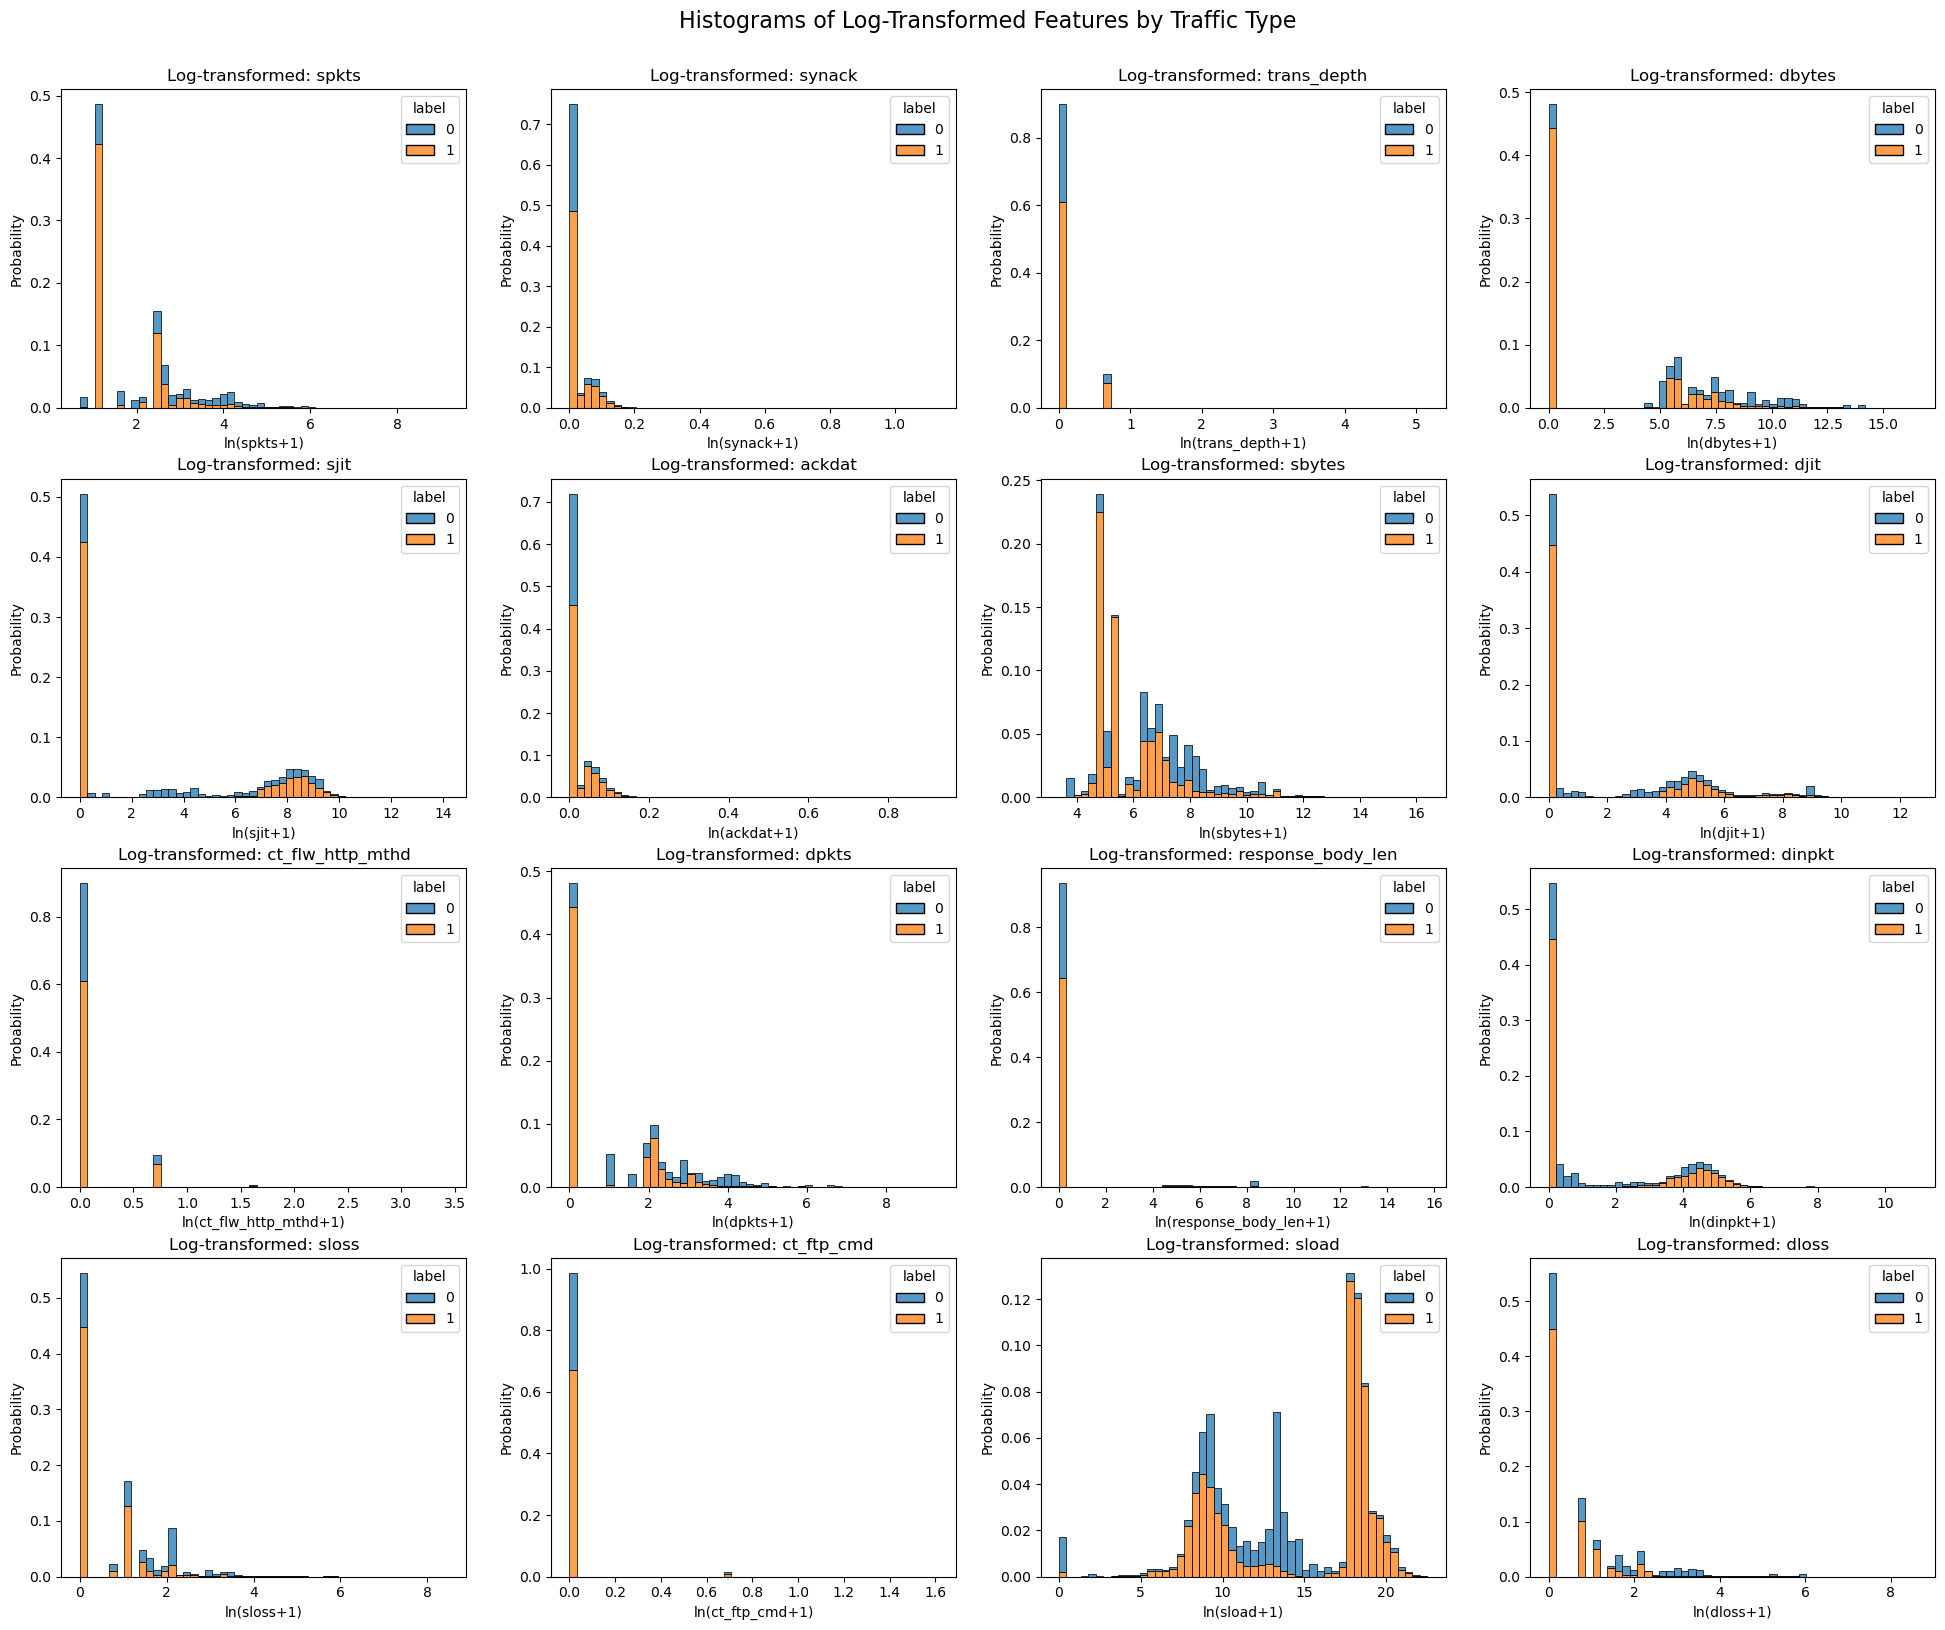

In [11]:
# Create stacked histograms of log-transformed features by label
n_rows = (len(features_to_transform) + 3) // 4  # Calculate rows needed for 4 columns
fig, axes = plt.subplots(n_rows, 4, figsize=(20, 4*n_rows))  # Wider figure with 4 columns
fig.tight_layout(pad=3.0)

# Add a title for the entire figure
fig.suptitle('Histograms of Log-Transformed Features by Traffic Type', fontsize=16, y=1.02)

# Handle both single and multiple row cases
axes = axes.flatten() if n_rows > 1 else [axes[0], axes[1], axes[2], axes[3]]

for i, feature in tqdm(enumerate(features_to_transform), desc="Plotting transformed histograms", total=len(features_to_transform)):
    # Plot stacked histogram with label coloring
    sns.histplot(
        data=df_log_transform.join(df['label']), 
        x=feature, 
        hue='label',
        kde=False, 
        ax=axes[i], 
        stat="probability", 
        multiple="stack", 
        bins=50
    )
    axes[i].set_title(f'Log-transformed: {feature}')
    axes[i].set_xlabel(f'ln({feature}+1)')

# Hide empty subplots
for j in range(len(features_to_transform), len(axes)):
    axes[j].set_visible(False)

plt.savefig('./EDA-Joe-Figures/log_transformed_histograms.png', bbox_inches='tight')
if FIGURES:
    plt.show()


Plotting KDE by label:   0%|          | 0/16 [00:00<?, ?it/s]

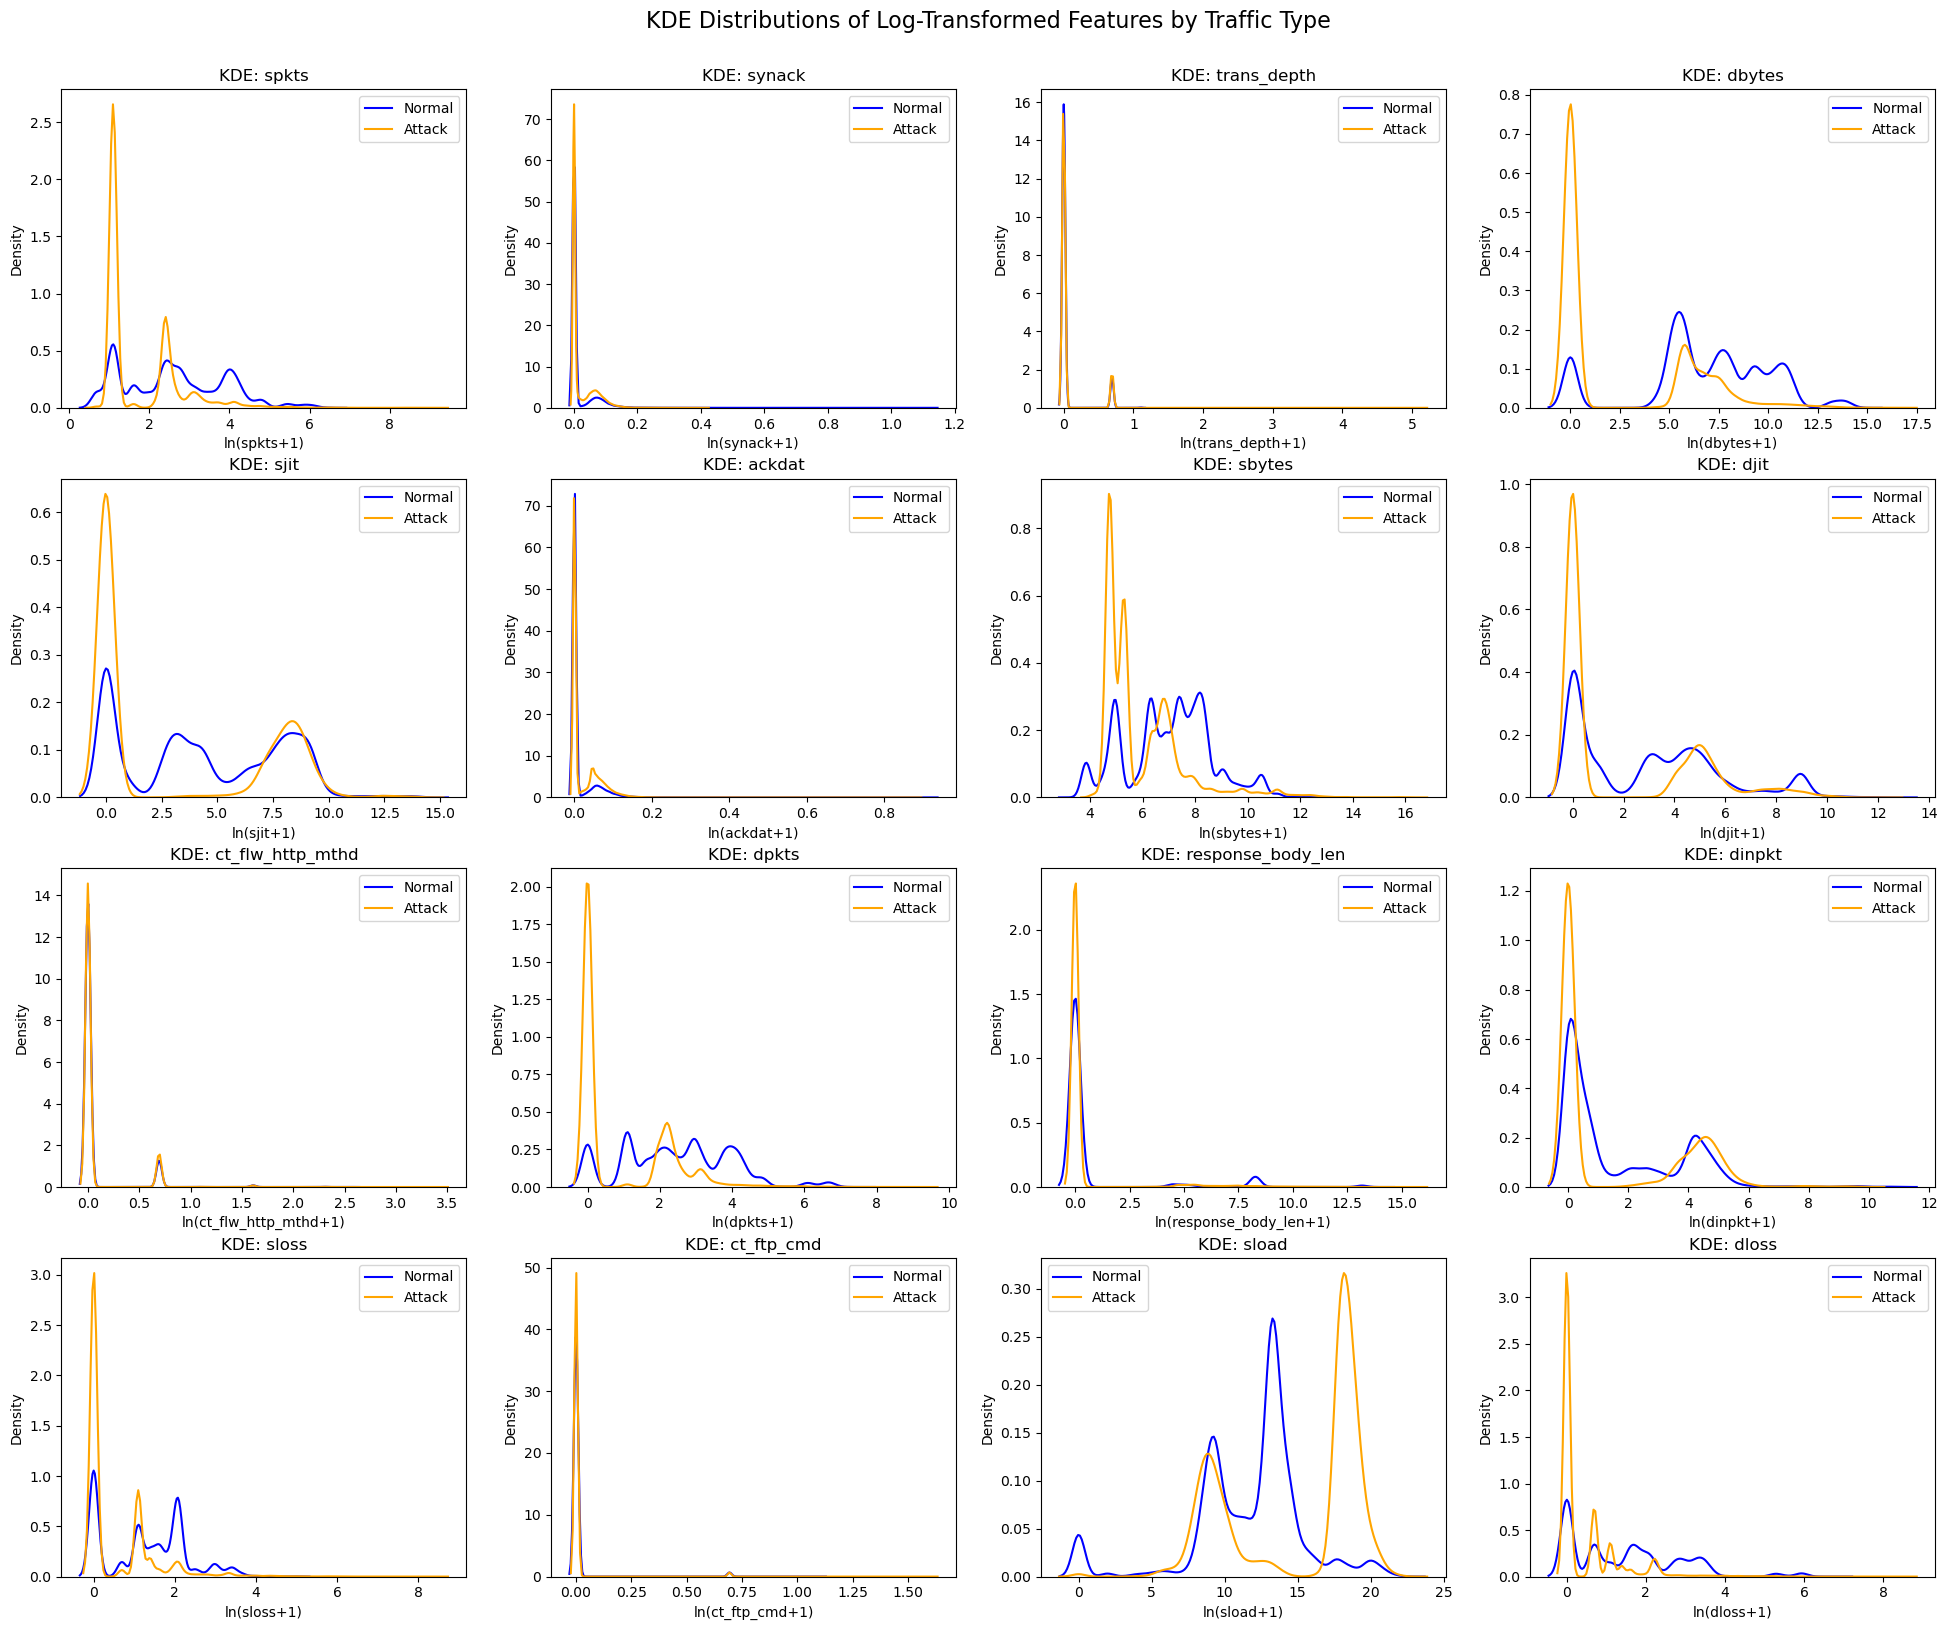

In [12]:
# Plot KDE distributions by label for transformed features
n_rows_kde = (len(features_to_transform) + 3) // 4  # Calculate rows needed for 4 columns
fig_kde, axes_kde = plt.subplots(n_rows_kde, 4, figsize=(20, 4*n_rows_kde))  # Wider figure with 4 columns
fig_kde.tight_layout(pad=3.0)

# Add a title for the entire figure
fig_kde.suptitle('KDE Distributions of Log-Transformed Features by Traffic Type', fontsize=16, y=1.02)

# Handle both single and multiple row cases
axes_kde = axes_kde.flatten() if n_rows_kde > 1 else [axes_kde[0], axes_kde[1], axes_kde[2], axes_kde[3]]

# Filter data by label once before the loop
normal_data = df_log_transform[df['label'] == 0]
attack_data = df_log_transform[df['label'] == 1]

for i, feature in tqdm(enumerate(features_to_transform), desc="Plotting KDE by label", total=len(features_to_transform)):
    ax = axes_kde[i]
    
    # Plot KDEs for normal and attack traffic
    sns.kdeplot(data=normal_data, x=feature, ax=ax, label='Normal', color='blue')
    sns.kdeplot(data=attack_data, x=feature, ax=ax, label='Attack', color='orange')
    
    ax.set_title(f'KDE: {feature}')
    ax.set_xlabel(f'ln({feature}+1)')
    ax.legend()

# Hide unused subplots
for j in range(len(features_to_transform), len(axes_kde)):
    axes_kde[j].set_visible(False)

plt.savefig('./EDA-Joe-Figures/log_transformed_kde_by_label.png', bbox_inches='tight')
if FIGURES:
    plt.show()


Plotting box plots:   0%|          | 0/16 [00:00<?, ?it/s]

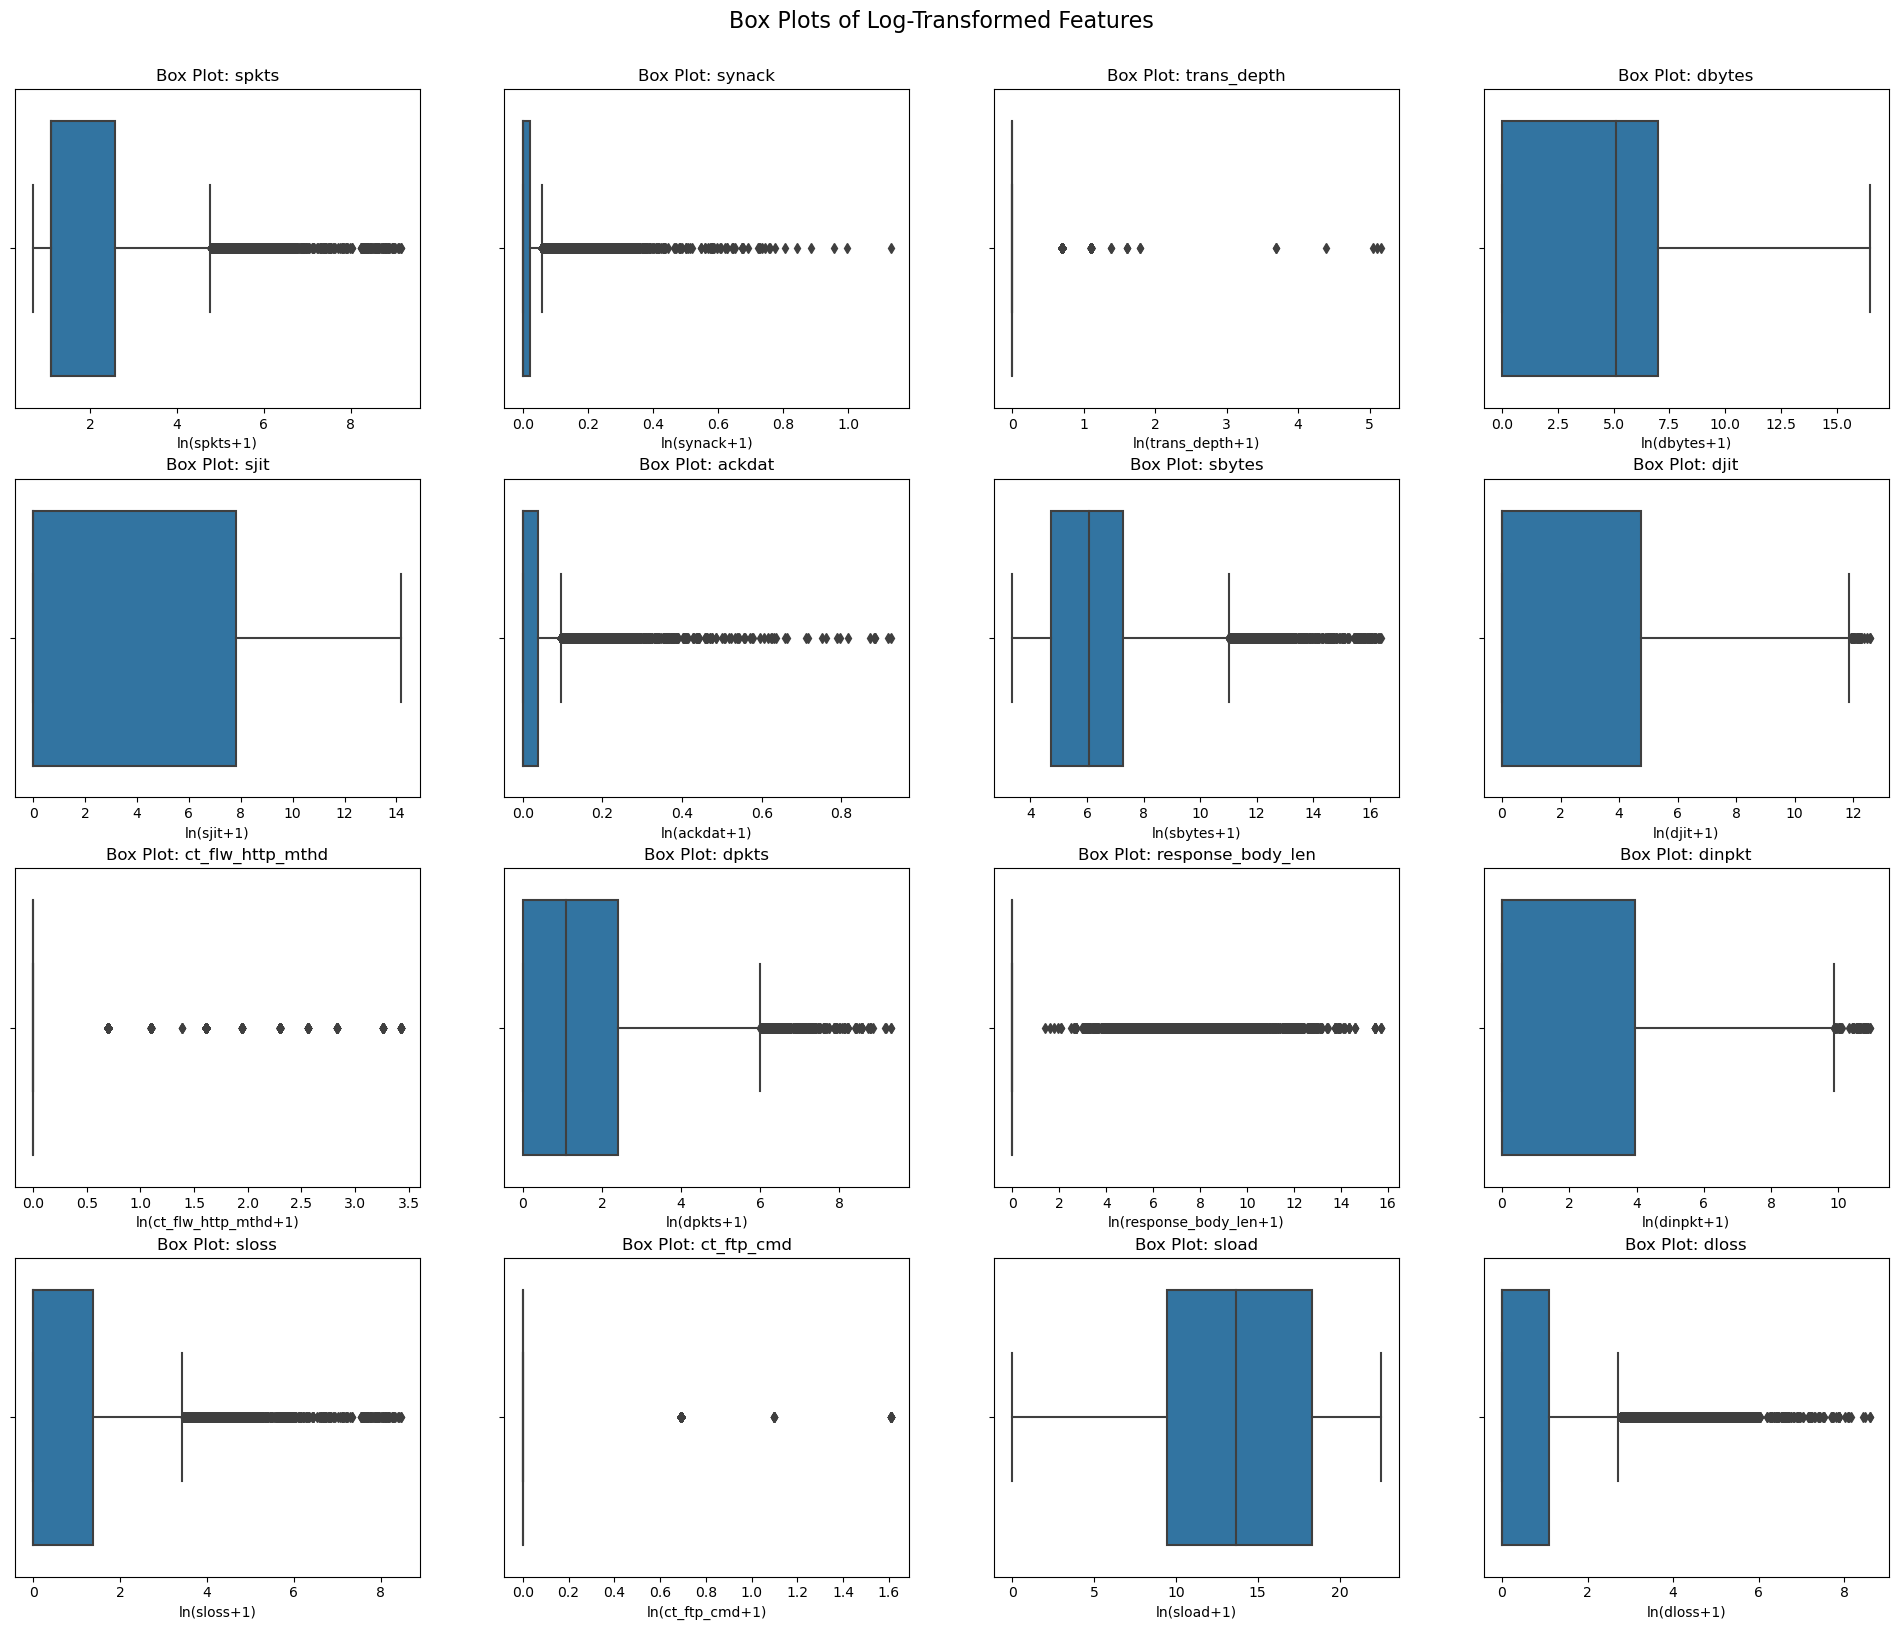

In [13]:
# Box plots of log-transformed features
n_rows_box = (len(features_to_transform) + 3) // 4  # Calculate rows needed for 4 columns
fig_box, axes_box = plt.subplots(n_rows_box, 4, figsize=(20, 4*n_rows_box))  # Increased width from 15 to 20
fig_box.tight_layout(pad=3.0)

# Add a title for the entire figure
fig_box.suptitle('Box Plots of Log-Transformed Features', fontsize=16, y=1.02)

# Handle both single and multiple row cases
axes_box = axes_box.flatten() if n_rows_box > 1 else [axes_box[0], axes_box[1], axes_box[2], axes_box[3]]

for i, feature in tqdm(enumerate(features_to_transform), desc="Plotting box plots", total=len(features_to_transform)):
    ax = axes_box[i]
    sns.boxplot(data=df_log_transform, x=feature, ax=ax)  # Changed y to x for horizontal orientation
    ax.set_title(f'Box Plot: {feature}')
    ax.set_xlabel(f'ln({feature}+1)')  # Changed ylabel to xlabel

# Hide unused subplots
for j in range(len(features_to_transform), len(axes_box)):
    axes_box[j].set_visible(False)

plt.savefig('./EDA-Joe-Figures/log_transformed_boxplots.png', bbox_inches='tight')
if FIGURES:
    plt.show()



Comparison of statistics before and after log transformation:


,Original_Kurtosis,Log_Kurtosis,Original_Skewness,Log_Skewness
spkts,1964.352894,0.967513,40.217703,1.116330
synack,117.960404,32.516060,5.786286,3.432785
trans_depth,34407.853786,12.252420,167.335829,2.924598
dbytes,2735.831070,-1.221277,39.760864,0.371869
sjit,350.559925,-1.522975,17.652157,0.430264
ackdat,107.726374,33.599253,5.615605,3.427472
sbytes,2314.880239,1.604716,45.303443,1.169003
djit,1336.151117,-0.533155,29.543830,0.847629
ct_flw_http_mthd,839.670145,24.198537,23.451424,4.051059
dpkts,2465.519335,-0.114233,36.764114,0.784531



Correlation with target before and after transformation:


,Original_Correlation,Log_Transformed_Correlation,Difference
dbytes,0.076871,0.513095,0.436224
dpkts,0.118591,0.471905,0.353314
sloss,0.000640,0.345359,0.344719
dloss,0.094685,0.402959,0.308274
spkts,0.052178,0.356008,0.303830
sbytes,0.018576,0.295735,0.277159
sjit,0.007069,0.149636,0.142566
sload,0.182870,0.322250,0.139381
djit,0.060870,0.170696,0.109826
response_body_len,0.021361,0.067386,0.046025


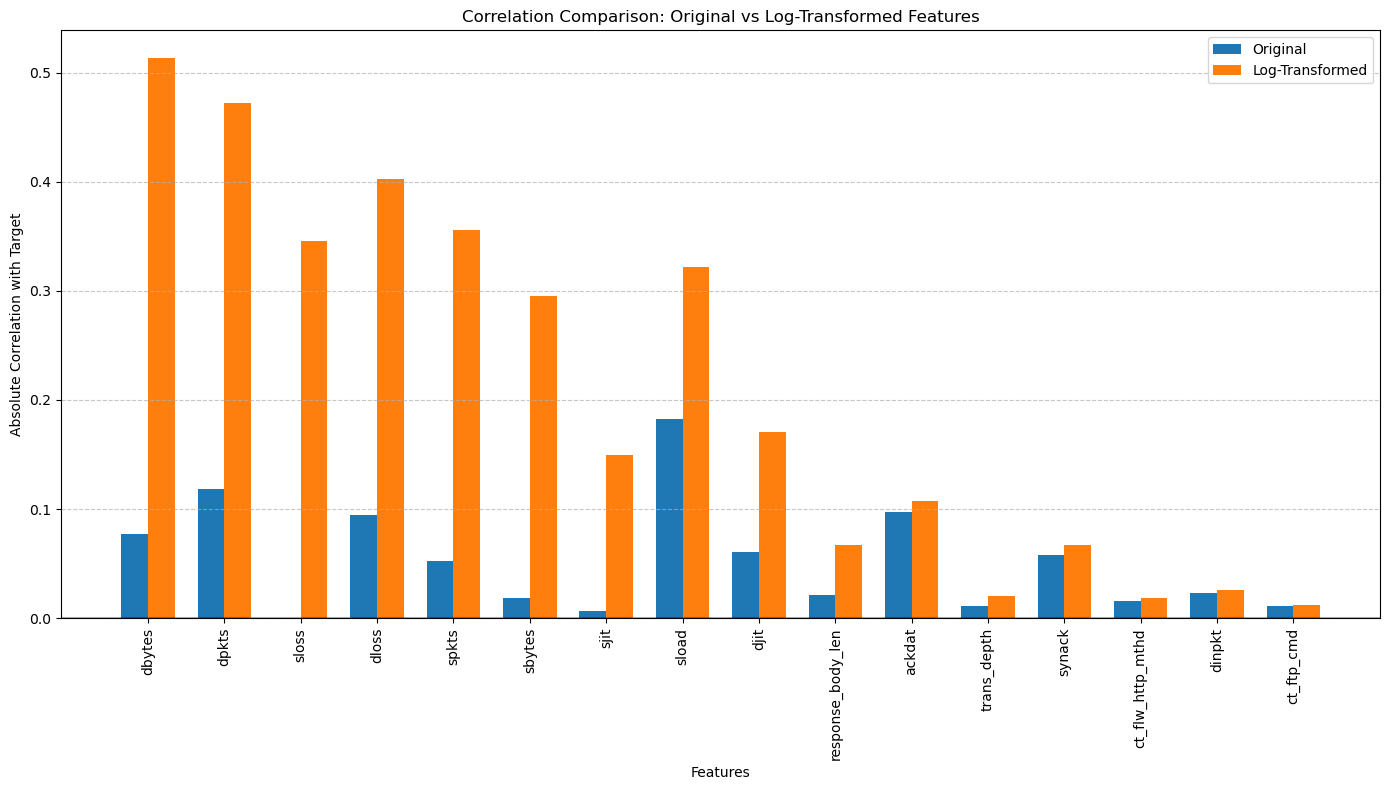

In [14]:
# Compare statistics before and after log transformation
log_kurtosis = df_log_transform.kurtosis().sort_values(ascending=False)
log_skewness = df_log_transform.skew().sort_values(ascending=False)

# Create comparison dataframe
comparison = pd.DataFrame({
    'Original_Kurtosis': df_transform.kurtosis(),
    'Log_Kurtosis': df_log_transform.kurtosis(),
    'Original_Skewness': df_transform.skew(),
    'Log_Skewness': df_log_transform.skew()
})

print("\nComparison of statistics before and after log transformation:")
display(comparison.head(10))

# Analyze correlation with target (if available)
if 'label' in df.columns:
    print("\nCorrelation with target before and after transformation:")
    
    # Calculate and compare correlations
    original_corr = df_transform.corrwith(df['label']).abs()
    transformed_corr = df_log_transform.corrwith(df['label']).abs()
    
    # Create correlation comparison dataframe
    corr_comparison = pd.DataFrame({
        'Original_Correlation': original_corr,
        'Log_Transformed_Correlation': transformed_corr,
        'Difference': transformed_corr - original_corr
    }).sort_values('Difference', ascending=False)
    
    display(corr_comparison)
    
    # Visualize correlation differences
    plt.figure(figsize=(14, 8))
    
    x = np.arange(len(corr_comparison))
    width = 0.35
    
    # Plot side-by-side bars
    plt.bar(x - width/2, corr_comparison['Original_Correlation'], width, label='Original')
    plt.bar(x + width/2, corr_comparison['Log_Transformed_Correlation'], width, label='Log-Transformed')
    
    # Format plot
    plt.xlabel('Features')
    plt.ylabel('Absolute Correlation with Target')
    plt.title('Correlation Comparison: Original vs Log-Transformed Features')
    plt.xticks(x, corr_comparison.index, rotation=90)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('./EDA-Joe-Figures/correlation_comparison_after_log_transform.png', bbox_inches='tight')
    plt.show()

And with the log transform we were able to GREATLY increase the correlation of many features. Next we will look at categorical features

# Exploration of Categorical Features
